In [42]:
import pandas as pd
PATH = "rijs_2011_all_data.csv"
all_data = pd.read_csv(PATH, index_col="target_gene", encoding="utf-8")
all_data_norm = (all_data - all_data.mean()) - all_data.std()
all_data

,glucose_uptake,growth_rate,acetate_secretion,pts,zwf,gnd,pgi,edd_eda,pfk_fba,tktA,...,glta_can,icd,suc,sdh_fum,mdh,mae,pck,pcc,pta_acka,acea_aceb
target_gene,,,,,,,,,,,,,,,,,,,,,
AlsR,8.11,0.54,3.92,7.14,1.93,1.55,5.19,0.39,5.90,0.50,...,2.33,2.33,1.48,1.48,1.02,0.46,0.36,2.61,4.04,0.0
AppY,7.74,0.55,4.76,7.41,2.45,1.43,4.94,1.02,5.58,0.46,...,1.91,1.91,1.07,1.07,0.61,0.46,0.18,2.41,5.09,0.0
ArcA,7.30,0.56,3.19,7.14,1.79,1.27,5.31,0.53,5.83,0.40,...,2.72,2.72,1.86,1.86,1.51,0.35,0.24,2.42,3.55,0.0
ArcB,7.36,0.56,4.39,7.30,1.94,1.60,5.33,0.34,6.08,0.51,...,2.30,2.30,1.46,1.46,1.40,0.06,0.51,2.34,4.37,0.0
ArgR,6.87,0.46,4.64,6.77,2.29,1.30,4.45,0.99,5.05,0.42,...,1.87,1.87,1.14,1.14,0.58,0.56,0.23,2.33,4.92,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RseA,6.29,0.53,5.31,6.53,1.84,1.26,4.67,0.57,5.24,0.41,...,1.55,1.55,0.84,0.84,0.56,0.28,0.22,2.02,4.78,0.0
RseB,6.22,0.54,4.51,6.69,2.08,1.28,4.59,0.80,5.14,0.41,...,1.63,1.63,0.84,0.84,0.56,0.29,0.22,2.17,4.38,0.0
Pgi,4.01,0.32,1.51,3.77,3.61,3.09,0.15,0.52,2.02,1.02,...,0.76,0.76,0.26,0.26,0.26,0.00,0.48,1.56,1.23,0.0


In [43]:
X = all_data_norm.iloc[:,:3].values
Y = all_data_norm.iloc[:,3:].values
print(X.shape, Y.shape)

(94, 3) (94, 23)


In [19]:
# XGBoost
# https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn
import xgboost as xgb # must be in AMN_windows env
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict as cvp
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.multioutput import MultiOutputRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from typing import Dict, Tuple, List

In [44]:
LOO_split = int(Y.shape[0])

xgb_preds = []

for i in range(5):

    # XGBoost = xgb.XGBRegressor(n_estimators=600, max_depth=2, learning_rate=0.01, objective='reg:squarederror', random_state=i)
    multioutputregressor = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror'))

    xgb_pred = cvp(multioutputregressor, X, Y, cv=KFold(n_splits=10, shuffle=True, random_state=i), n_jobs = 5)
    
    xgb_preds.append(xgb_pred)

In [45]:
mean_xgb_pred = np.array(xgb_preds).mean(axis=0)
std_xgb = np.array(xgb_preds).std(axis=0)

print(np.mean((mean_xgb_pred - Y)**2, axis=0)) # MSE between mean prediction (over 5 times 10-fold test sets) and true

print(r2_score(Y, mean_xgb_pred, multioutput='variance_weighted'))

[6.30600527e-02 2.01017952e-01 9.80832917e-02 2.49286207e-01
 8.89814019e-02 1.50762840e-01 1.07925110e-02 1.06094694e-02
 1.07925110e-02 3.12578679e-01 2.94514191e-01 2.48001330e-01
 1.88793714e-01 7.10765590e-02 7.10765590e-02 7.05467372e-02
 7.05467372e-02 9.88270385e-02 6.13831638e-02 3.06292000e-02
 4.68718698e-02 2.06066973e-01 7.10368426e-32]
0.7145838133702572


<AxesSubplot:>

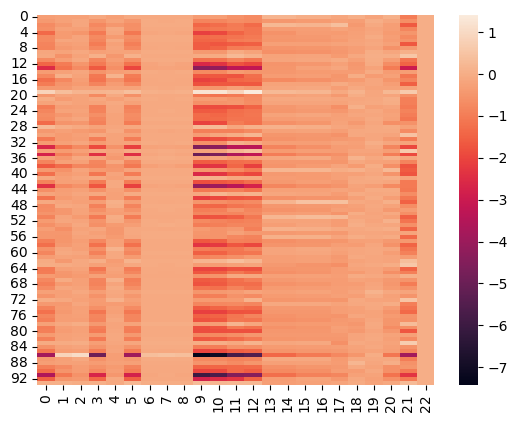

In [46]:
sns.heatmap(mean_xgb_pred)

<AxesSubplot:>

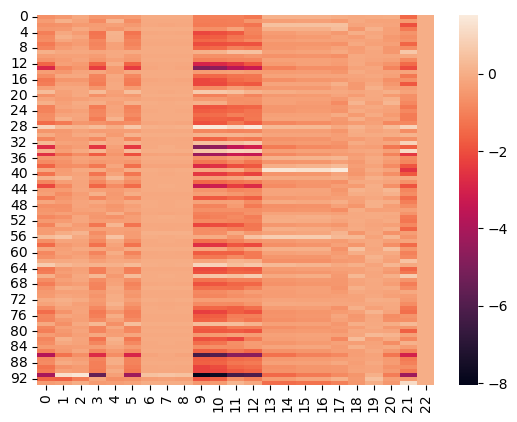

In [47]:
sns.heatmap(Y)

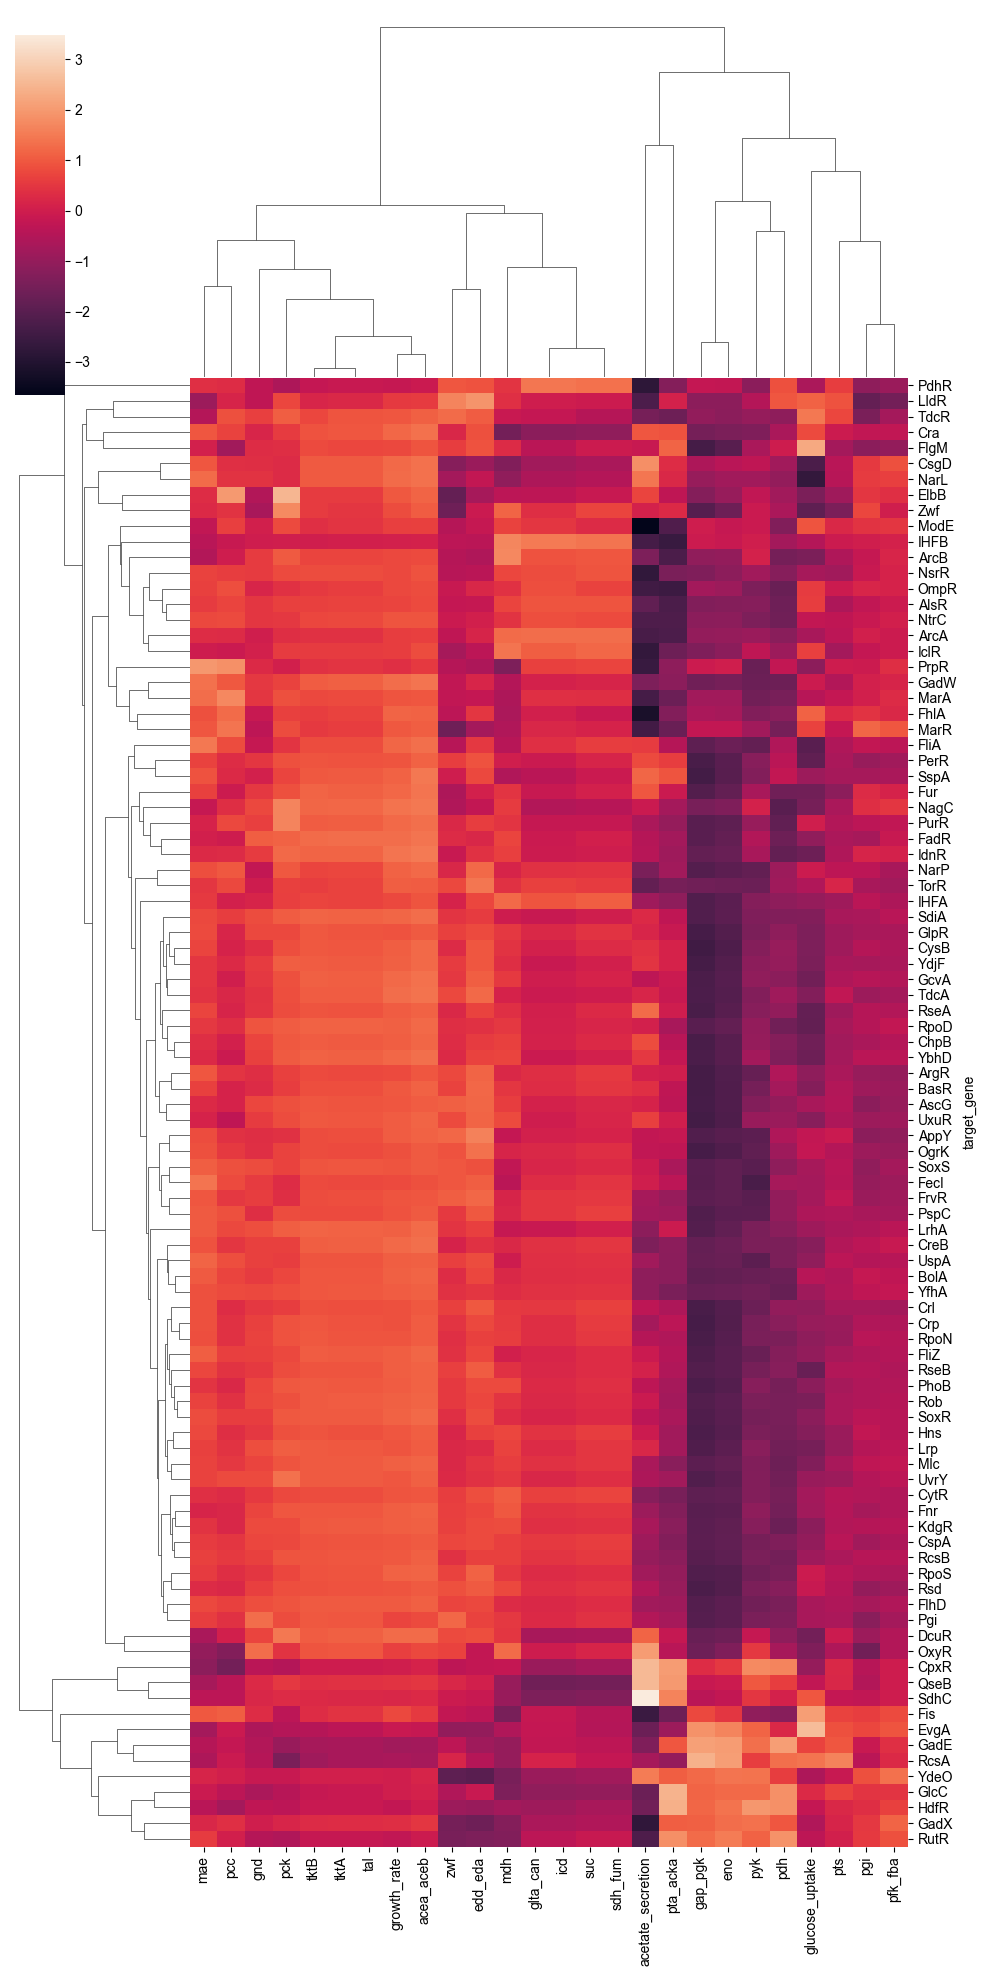

In [3]:
plt.close('all')
clustergrid = sns.clustermap(all_data_norm, z_score=0, figsize=(10,20), yticklabels=True)
ordered_fluxes_indices = clustergrid.dendrogram_col.reordered_ind
ordered_genes_indices = clustergrid.dendrogram_row.reordered_ind
sns.set_theme(palette="colorblind")
plt.show()

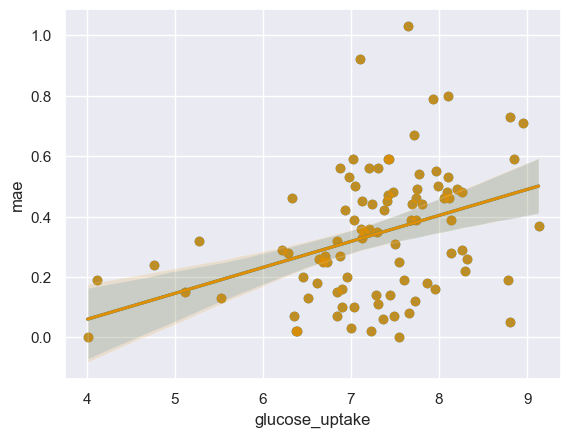

In [9]:
sns.regplot(data=all_data, x="glucose_uptake", y="mae")
plt.show()

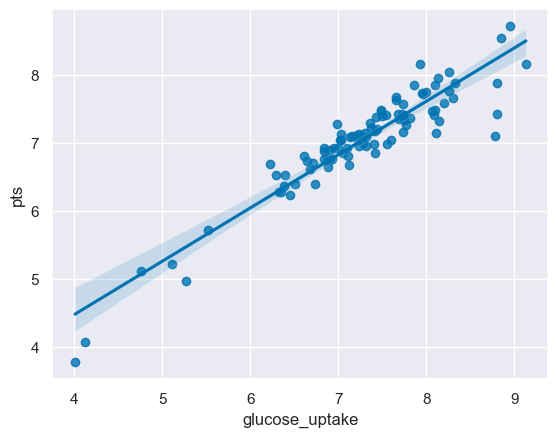

In [11]:
sns.regplot(data=all_data, x="glucose_uptake", y="pts")
plt.show()

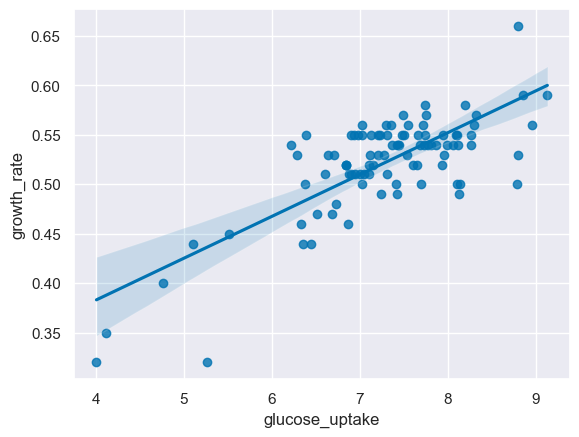

In [13]:
sns.regplot(data=all_data, x="glucose_uptake", y="growth_rate")
plt.show()

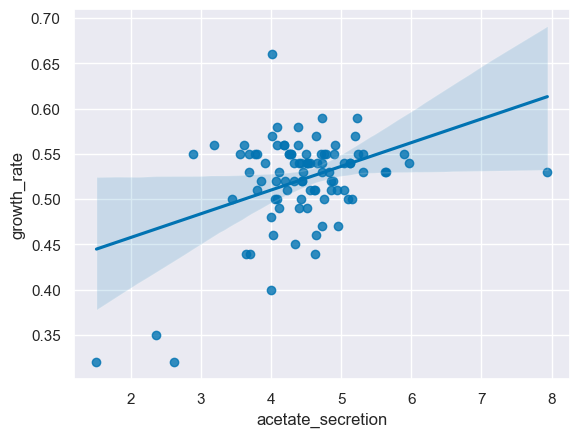

In [14]:
sns.regplot(data=all_data, x="acetate_secretion", y="growth_rate")
plt.show()

(94, 94)


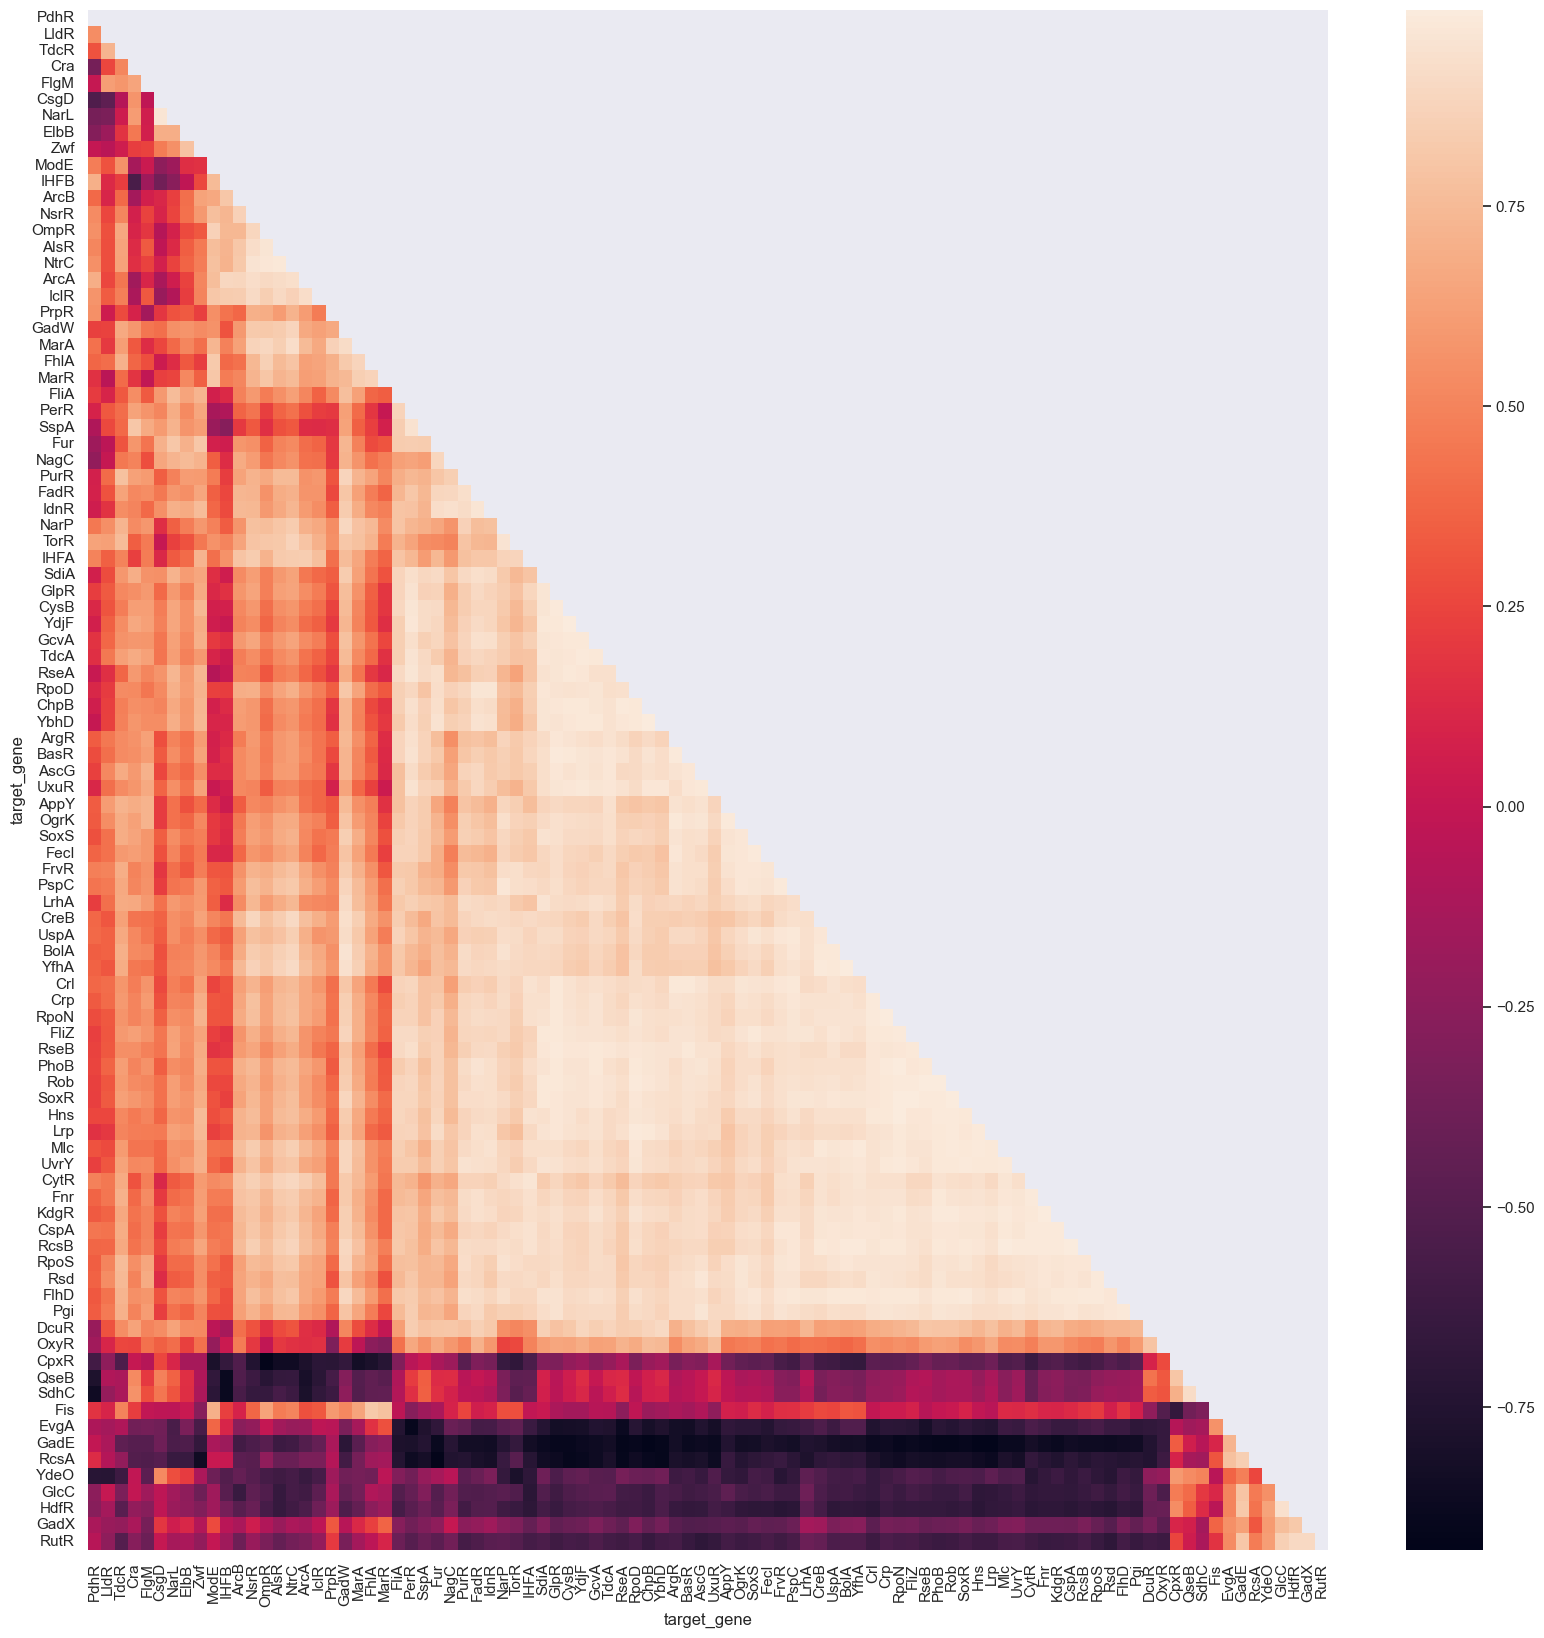

In [18]:
corr_mat_genes = all_data_norm.iloc[ordered_genes_indices].T.corr()
mask = np.triu(np.ones_like(all_data_norm.T.corr()))
print(mask.shape)
fig, ax = plt.subplots(figsize=(20, 20))
g = sns.heatmap(corr_mat_genes, xticklabels=all_data_norm.index[ordered_genes_indices], yticklabels=all_data_norm.index[ordered_genes_indices], mask=mask)
sns.set_theme(palette="colorblind")
plt.show()

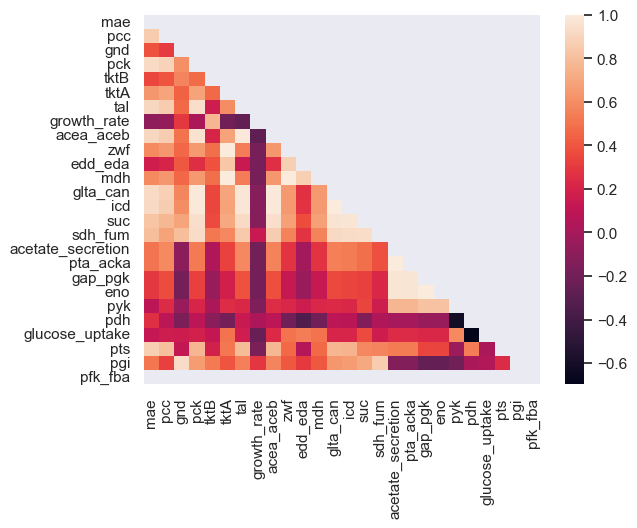

In [19]:
plt.close('all')
corr_mat_fluxes = all_data_norm.iloc[ordered_fluxes_indices].corr()
mask = np.triu(np.ones_like(corr_mat_fluxes))
sns.heatmap(corr_mat_fluxes, xticklabels=all_data.columns[ordered_fluxes_indices], yticklabels=all_data.columns[ordered_fluxes_indices], mask=mask)
sns.set_theme(palette="colorblind")
plt.show()